# Allen atlas image regression

In [26]:
import numpy as np
import os
import functools
import time
from pathlib import Path
from tqdm import tqdm
from allensdk.core.reference_space import ReferenceSpace
from allensdk.core.reference_space_cache import ReferenceSpaceCache
from atlas_functions import *
import ants
import nrrd
import scipy
import cv2
from PIL import Image

You chose: /Users/vincentchouinard/Documents/GitHub/Atlas
['annotation_25.nrrd']


100%|███████████████████████████████████████| 320/320 [00:00<00:00, 1805.83it/s]


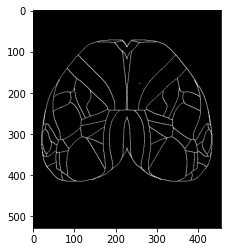

In [103]:
directory = search_for_file_path()
rsp, tree = open_AllenSDK()
isocortex_map, id_name_dict, bregma = map_generator(rsp, tree, structure='Isocortex')

#sma_mask = create_mask(isocortex_map, 656)
#contour = create_contour(isocortex_map)



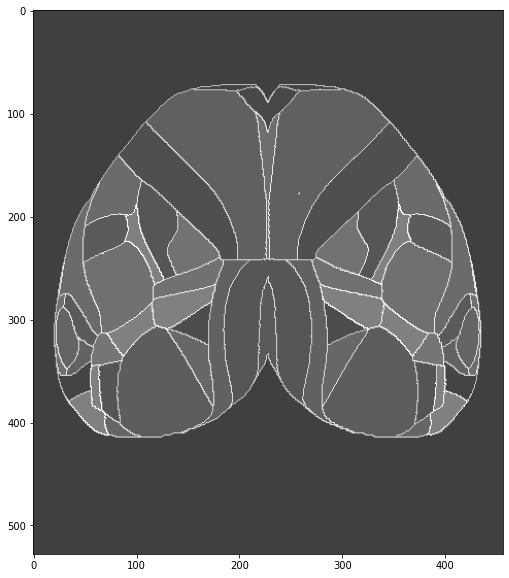

In [126]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(isocortex_map,vmax=1300, cmap='gray', alpha=0.5)
plt.imshow(contour, cmap='binary_r', alpha=0.5)
plt.show()

# Saving isocortex Mask

In [3]:
isocortex_mask = np.zeros(isocortex_map.shape)
mask_list = []
for i in id_name_dict:
    mask_list.append(i)
isocortex_mask = create_mask(isocortex_map, mask_list)
isocortex_mask_int8 = isocortex_mask.astype('uint8')

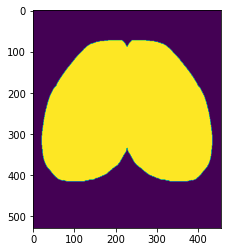

In [4]:
plt.imshow(isocortex_mask)
plt.imshow()
plt.show()

In [11]:
#filePath = search_for_file_path()
#image_name = 'isocortex_mask_int8'
#imageio.imwrite(str(filePath) + image_name + '.tif', isocortex_mask)

You chose: /Users/vincentchouinard/Documents/GitHub/Atlas


In [114]:
contour = create_contour(isocortex_map)
contour.shape
print(contour)
type(contour)
contour.dtype
contour = contour.astype('uint8')
contour.dtype

path = search_for_file_path()
name = 'contour'
im = Image.fromarray(contour)
im.save(os.path.join(path, name + ".tif"))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
You chose: /Users/vincentchouinard/Documents/GitHub/Atlas


In [115]:
tif_to_nrrd("contour.tif")

You chose: /Users/vincentchouinard/Documents/GitHub/Atlas/saved_images


In [6]:
#im = Image.fromarray(isocortex_mask_int8)
#im.save(os.path.join(filePath, image_name + ".tif"))

# Opening both masks and finding transform

In [6]:
#atlas_array = cv2.imread("/Users/vincentchouinard/Documents/GitHub/Atlas/saved_images/isocortex_mask.tif")
#atlas_array = cv2.imread("/Users/vincentchouinard/Documents/GitHub/Atlas/saved_images/isocortex_churchland_mask_int8.tif")
#atlas_array = atlas_array[:,:,0].astype('uint8')
#print(atlas_array.dtype)
#print(atlas_array[200,200])
#print(atlas_array[3,7])

In [7]:
#atlas_array = atlas_array/255
#atlas_array = atlas_array.astype("uint8")
#plt.imshow(atlas_array, cmap="binary_r")
#plt.colorbar()
#plt.show()
#print(atlas_array.dtype)
#print(atlas_array[200,200])
#print(atlas_array[3,7])

In [102]:
name = 'contour'
im = Image.fromarray(contour)
im.save(os.path.join(path, name + ".tif"))

TypeError: Cannot handle this data type: (1, 1), <i8

In [116]:
contour_ants = ants.image_read(directory + "/saved_images/contour.nrrd")

In [9]:
#img = cv2.imread(directory + "/" + "saved_images/isocortex_mask_churchland_int8.tif", cv2.IMREAD_GRAYSCALE)

In [27]:
def tif_to_nrrd(filename):
    path = search_for_file_path()
    img = cv2.imread(path + "/" + filename, cv2.IMREAD_GRAYSCALE)
    filename = Path(filename).stem
    nrrd.write(path + "/" + filename + '.nrrd', img)
    return 

In [193]:
# Opens both files in the directory I choose
tif_to_nrrd("isocortex_churchland_mask_v3.tif")
#tif_to_nrrd("isocortex_mask_int8.tif")

You chose: /Users/vincentchouinard/Documents/GitHub/Atlas/saved_images


In [14]:
#churchland_nrrd, header = nrrd.read(directory + "/saved_images/isocortex_mask_churchland_int8.nrrd")
#print(header)
#header['space directions'] = np.delete(header['space directions'], 2, 1)
#header['space directions'] = np.array([[30, 0],[0,30]])
#print(header)

OrderedDict([('type', 'uint8'), ('encoding', 'raw'), ('endian', 'big'), ('dimension', 2), ('sizes', array([382, 384])), ('space dimension', 2), ('space directions', array([[30.,  0.,  0.],
       [ 0., 30.,  0.]])), ('space units', ['microns', 'microns'])])
OrderedDict([('type', 'uint8'), ('encoding', 'raw'), ('endian', 'big'), ('dimension', 2), ('sizes', array([382, 384])), ('space dimension', 2), ('space directions', array([[30,  0],
       [ 0, 30]])), ('space units', ['microns', 'microns'])])


In [194]:
churchland = ants.image_read(directory + "/saved_images/isocortex_churchland_mask_v3.nrrd")
atlas = ants.image_read(directory + "/saved_images/isocortex_mask_int8.nrrd")

In [72]:
#churchland = ants.image_read(directory + "/saved_images/rot_isocortex_mask_churchland_int8.nrrd")

In [94]:
#atlas = ants.image_read(directory + "/saved_images/isocortex_mask_int8.nrrd")
contour_ants = ants.image_read("contour.nrrd")

KeyError: 'longlong'

In [195]:
mytx = ants.registration(fixed=churchland, moving=atlas, type_of_transform = ('SyN'), syn_sampling = 8)

In [196]:
#print(mytx)

In [197]:
atlas_warped = ants.apply_transforms(churchland, atlas, mytx['fwdtransforms']).numpy()
contours_warped = ants.apply_transforms(churchland, contour_ants, mytx['fwdtransforms']).numpy()

In [179]:
path = search_for_file_path()
filename = 'isocortex_churchland.tif'
img = cv2.imread(path + "/" + filename, cv2.IMREAD_GRAYSCALE)

You chose: /Users/vincentchouinard/Desktop


AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

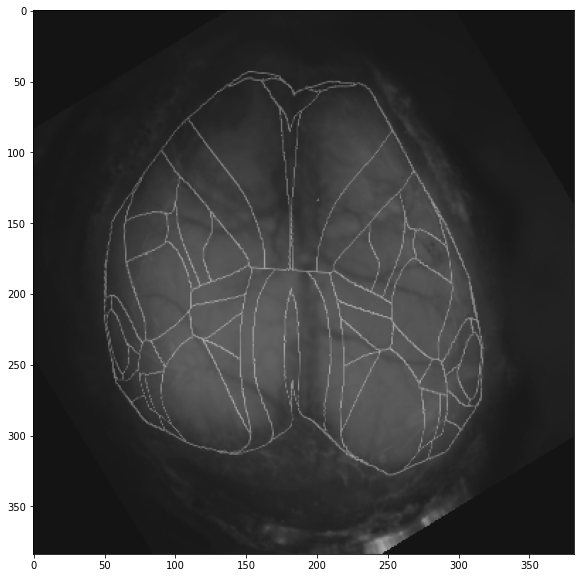

In [202]:
fig, ax = plt.subplots(figsize=(10, 10))
#plt.imshow(atlas_warped, alpha=0.5)
plt.imshow(contours_warped, cmap='binary_r', alpha=0.8)
#plt.imshow(churchland.numpy(), alpha=0.5)
plt.imshow(img, cmap='binary_r', alpha=0.6)

NameError: name 'asd' is not defined